# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\conor\\Hackathon2\\Hackathon2-Team-3\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\conor\\Hackathon2\\Hackathon2-Team-3'

# Section 1

Initial Data Exploration

In [6]:

import pandas as pd

# Load the dataset

df = pd.read_csv('Tourist_Travel_Europe.csv')

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tourist_ID            1000 non-null   int64 
 1   Country_Visited       1000 non-null   object
 2   City_Visited          1000 non-null   object
 3   Mode_of_Travel        1000 non-null   object
 4   Travel_Duration_Days  1000 non-null   int64 
 5   Number_of_Companions  1000 non-null   int64 
 6   Total_Travel_Cost     1000 non-null   int64 
 7   Accommodation_Type    1000 non-null   object
 8   Main_Purpose          1000 non-null   object
 9   Season_of_Visit       1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit
0,1,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer
1,2,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter
2,3,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter
3,4,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer
4,5,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring


In [7]:
# Check for missing values
df.isnull().sum()

Tourist_ID              0
Country_Visited         0
City_Visited            0
Mode_of_Travel          0
Travel_Duration_Days    0
Number_of_Companions    0
Total_Travel_Cost       0
Accommodation_Type      0
Main_Purpose            0
Season_of_Visit         0
dtype: int64

In [9]:
# Check for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
# Check for negative values
negative_values = df.select_dtypes(include=['number'])[df.select_dtypes(include=['number']) < 0].dropna(how='all')
print(negative_values)

Empty DataFrame
Columns: [Tourist_ID, Travel_Duration_Days, Number_of_Companions, Total_Travel_Cost]
Index: []


In [10]:
# Checking for unique values in categorical columns in case of duplicates due to typos
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'Country_Visited':
['Germany' 'UK' 'Greece' 'Portugal' 'Spain' 'Austria' 'Italy'
 'Netherlands' 'France' 'Switzerland']
Unique values in 'City_Visited':
['Hamburg' 'Berlin' 'Manchester' 'Thessaloniki' 'Athens' 'Lisbon' 'Faro'
 'Madrid' 'Salzburg' 'London' 'Rome' 'Utrecht' 'Paris' 'Lucerne' 'Porto'
 'Lyon' 'Edinburgh' 'Seville' 'Rotterdam' 'Vienna' 'Santorini' 'Innsbruck'
 'Barcelona' 'Zurich' 'Nice' 'Geneva' 'Amsterdam' 'Venice' 'Milan'
 'Munich']
Unique values in 'Mode_of_Travel':
['Flight' 'Car' 'Bicycle' 'Bus' 'Train']
Unique values in 'Accommodation_Type':
['Hotel' 'Hostel' 'Camping' 'Airbnb']
Unique values in 'Main_Purpose':
['Family Visit' 'Business' 'Leisure']
Unique values in 'Season_of_Visit':
['Summer' 'Winter' 'Spring' 'Fall']


In [7]:
import numpy as np
import pandas as pd

In [8]:
import plotly.express as px

# Select numerical columns only
numerical_cols = df.select_dtypes(include=['number']).columns

# Store outlier counts
outlier_counts = {}

# Iterate through each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

    # Display box plot for each numerical column
    fig = px.box(df, y=col, title=f"Outlier Detection in {col}")
    fig.show()

# Print outlier summary
print("Outlier Counts per Column:")
print(outlier_counts)

Outlier Counts per Column:
{'Tourist_ID': 0, 'Travel_Duration_Days': 0, 'Number_of_Companions': 0, 'Total_Travel_Cost': 0}


---

# Section 2

Section 2 content

---

Section 3

In [11]:
# Manually mapping known cities to their latitude and longitude coordinates
city_coordinates = {
    "Hamburg": (53.5511, 9.9937),
    "Berlin": (52.5200, 13.4050),
    "Manchester": (53.4808, -2.2426),
    "Thessaloniki": (40.6401, 22.9444),
    "Athens": (37.9838, 23.7275),
    "Lisbon": (38.7169, -9.1399),
    "Faro": (37.0194, -7.9322),
    "Madrid": (40.4168, -3.7038),
    "Salzburg": (47.8095, 13.0550),
    "London": (51.5074, -0.1278),
    "Rome": (41.9028, 12.4964),
    "Utrecht": (52.0907, 5.1214),
    "Paris": (48.8566, 2.3522),
    "Lucerne": (47.0505, 8.3059),
    "Porto": (41.1579, -8.6291),
    "Lyon": (45.7640, 4.8357),
    "Edinburgh": (55.9533, -3.1883),
    "Seville": (37.3886, -5.9823),
    "Rotterdam": (51.9225, 4.4792),
    "Vienna": (48.2082, 16.3738),
    "Santorini": (36.3932, 25.4615),
    "Innsbruck": (47.2692, 11.4041),
    "Barcelona": (41.3851, 2.1734),
    "Zurich": (47.3769, 8.5417),
    "Nice": (43.7102, 7.2620),
    "Geneva": (46.2044, 6.1432),
    "Amsterdam": (52.3676, 4.9041),
    "Venice": (45.4408, 12.3155),
    "Milan": (45.4642, 9.1900),
    "Munich": (48.1351, 11.5820)
}
df_copy = df.copy()
# Add latitude and longitude to the dataset
df_copy['Latitude'] = df['City_Visited'].map(lambda x: city_coordinates.get(x, (None, None))[0])
df_copy['Longitude'] = df['City_Visited'].map(lambda x: city_coordinates.get(x, (None, None))[1])

# Save and preview the updated dataset
df_copy

,Tourist_ID,Country_Visited,City_Visited,Mode_of_Travel,Travel_Duration_Days,Number_of_Companions,Total_Travel_Cost,Accommodation_Type,Main_Purpose,Season_of_Visit,Latitude,Longitude
0,1,Germany,Hamburg,Flight,8,4,1060,Hotel,Family Visit,Summer,53.5511,9.9937
1,2,Germany,Berlin,Car,16,3,3972,Hostel,Family Visit,Winter,52.5200,13.4050
2,3,UK,Manchester,Bicycle,8,2,666,Camping,Business,Winter,53.4808,-2.2426
3,4,Greece,Thessaloniki,Bicycle,12,3,3644,Hotel,Business,Summer,40.6401,22.9444
4,5,Greece,Thessaloniki,Flight,5,3,1885,Airbnb,Leisure,Spring,40.6401,22.9444
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,France,Lyon,Bus,20,5,4002,Hotel,Business,Fall,45.7640,4.8357
996,997,Switzerland,Geneva,Bus,19,4,2170,Airbnb,Family Visit,Fall,46.2044,6.1432
997,998,Austria,Vienna,Car,16,4,1102,Hotel,Leisure,Fall,48.2082,16.3738
998,999,UK,Manchester,Flight,14,3,3319,Hotel,Business,Summer,53.4808,-2.2426


In [20]:


df_grouped = df_copy.groupby(["City_Visited", "Country_Visited", "Latitude", "Longitude"], as_index=False).agg(
    {
        "Travel_Duration_Days": "mean",
        "Number_of_Companions": "mean",
        "Total_Travel_Cost": "mean"
    }
)

# Create a Mapbox scatter plot
fig = px.scatter_mapbox(
    df_grouped,
    lat="Latitude",
    lon="Longitude",
    hover_name="City_Visited",
    hover_data={
        "Country_Visited": True,
        "Travel_Duration_Days": ":.2f",  # Show averages with 2 decimal places
        "Number_of_Companions": ":.2f",
        "Total_Travel_Cost": ":.2f"
    },
    color="Total_Travel_Cost",  # Color by travel cost
    size="Travel_Duration_Days",  # Size represents travel duration
    size_max=20,  # Increase max size for better differentiation
    zoom=3,
    mapbox_style="carto-positron",
    title="Mapbox: Travel Cost, Duration & Companions"
)

fig.show()


C:\Users\conor\AppData\Local\Temp\ipykernel_40788\1144297077.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




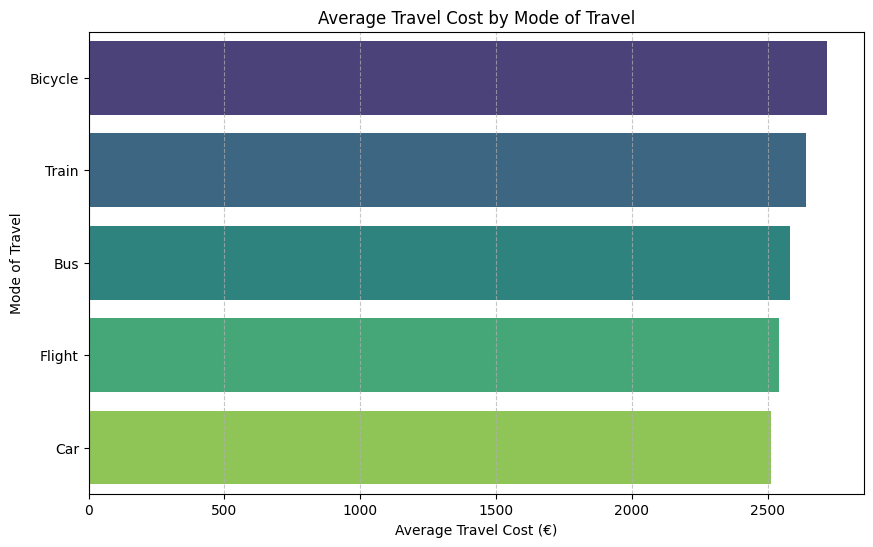

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check if 'Mode_of_Travel' exists in the dataset
if "Mode_of_Travel" in df.columns:
    # Group by mode of travel and calculate average travel cost
    df_travel_mode = df.groupby("Mode_of_Travel", as_index=False)["Total_Travel_Cost"].mean()

    # Sort values for better visualization
    df_travel_mode = df_travel_mode.sort_values(by="Total_Travel_Cost", ascending=False)

    # Create a bar plot comparing average travel costs by mode of travel
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Total_Travel_Cost", y="Mode_of_Travel", data=df_travel_mode, palette="viridis")

    # Add labels and title
    plt.xlabel("Average Travel Cost (€)")
    plt.ylabel("Mode of Travel")
    plt.title("Average Travel Cost by Mode of Travel")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()
else:
    print("The dataset does not contain a 'Mode_of_Travel' column.")

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
